<a href="https://colab.research.google.com/github/Ananya-Dash/Tech-Society/blob/main/Image_Classification_using_Convolutional_Neural_Networks_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Graph - Plotting
%matplotlib inline
import seaborn as sns
import tensorflow as tf # Mostly used For Training deep Learning Models
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


Collecting CIFAR 10 dataset and splitting them to training and testing datasets

In [ ]:
(X_train, y_train), (X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [ ]:
print(X_test)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

Data Processing & Visulization

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
print(y_test)

[3 8 8 ... 5 1 7]


In [ ]:
print(y_train)

[6 9 9 ... 9 1 1]


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

To check whether training and testing data is working, we plot a graph

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

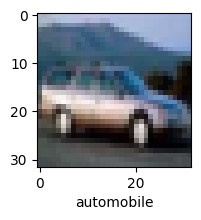

In [ ]:
plot_sample(X_train, y_train, 4)

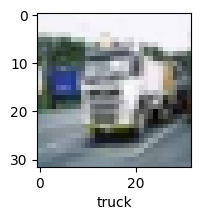

In [ ]:
plot_sample(X_train, y_train, 1000)

Normalizing the data: To make the data more suitable for training Neural Networks

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Set up basic ANN(Artificial Neural network) Model. Performing training

Build a simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([ # Ann variable Contains Model
        layers.Flatten(input_shape=(32,32,3)), # First Layer, falltening layer, 32*32*3, Flatten into 1D Array- Preprocessing Step
        layers.Dense(3000, activation='relu'), # Responsible ffor learning complex Data pttern
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])  # Creating Model

ann.compile(optimizer='SGD', # Stochastic Gradient Descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])   # Compiling Model

ann.fit(X_train, y_train, epochs=20)  #epoach - train Process

Epoch 1/20
1563/1563 [==============================] - 17s 9ms/step - loss: 1.8127 - accuracy: 0.3544
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6240 - accuracy: 0.4257
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5455 - accuracy: 0.4553
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4810 - accuracy: 0.4797
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4338 - accuracy: 0.4941
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3902 - accuracy: 0.5115
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3503 - accuracy: 0.5264
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3171 - accuracy: 0.5390
Epoch 9/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2837 - accuracy: 0.5487
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2

Evaluate the ANN model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.66      0.63      1000
           1       0.51      0.80      0.62      1000
           2       0.54      0.30      0.39      1000
           3       0.43      0.25      0.31      1000
           4       0.50      0.45      0.47      1000
           5       0.40      0.56      0.47      1000
           6       0.65      0.52      0.58      1000
           7       0.57      0.64      0.60      1000
           8       0.71      0.58      0.64      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



CNN(Convolutional Neural netwwrok) -- Image Classification

Build a convolutional neural network to train the images ---> Training Images:

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),# Reducing The Computation

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 4ms/step - loss: 1.5134 - accuracy: 0.4520
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1528 - accuracy: 0.5954
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0068 - accuracy: 0.6511
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9297 - accuracy: 0.6768
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8668 - accuracy: 0.6997


Evaluate the CNN model

In [ ]:
cnn.evaluate(X_test, y_test)

y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
y_test[:5]
classes[y_classes[3]]
classes[y_classes[2]]

313/313 [==============================] - 1s 2ms/step


'ship'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      1000
           1       0.79      0.79      0.79      1000
           2       0.53      0.60      0.56      1000
           3       0.51      0.53      0.52      1000
           4       0.71      0.49      0.58      1000
           5       0.68      0.52      0.59      1000
           6       0.71      0.82      0.76      1000
           7       0.71      0.73      0.72      1000
           8       0.66      0.87      0.75      1000
           9       0.80      0.72      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



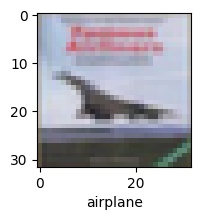

In [ ]:
plot_sample(X_test, y_test, 3)

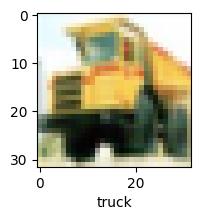

In [ ]:
plot_sample(X_test, y_test, 400)